In [ ]:
'''해야할 일
   1)MDS의 평균거리행렬 구하는 방법 조사하기(예제처럼 구할 수가 없다.) & 평균거리행렬 외의 거리행렬 조사하기
   2)MDS의 분석별 자주 쓰는 기법들에 대해 조사하기
   3)다중상응분석의 동일한 범주값이 2개 이상의 변수에서 중복 사용되지 않도록 해야 한다는 말 이해하기
   4)다중상응분석의 축별 카이제곱통계량 비율, 요인분석의 고유값에 대한 비율이라는 말 이해하기
   ->각 요인의 카이제곱통계량은 요인의 정보, 분산량 / 전체 정보, 분산량으로 요인의 데이터 설명 비율을 의미한다.
   5)차원수 선택 예제 확인하기
'''
# 포지셔닝 정보에 대해 추가 조사가 필요하다.
# https://www.ibm.com/docs/ko/spss-statistics/25.0.0?topic=SSLVMB_25.0.0/spss/base/idh_alsc_mea.htm
# https://analysis-flood.tistory.com/41

In [1]:
import pandas as pd
import numpy as np

## 포지셔닝 분석(Positioning)
- 개체를 좌표평면과 같은 다차원 공간에 표시하는 맵핑은 기존보다 차원이 증가하거나 변수간 중요도가 반영되지 않아도 된다면 포지셔닝 기법으로 볼 수 있다.
- 요인분석과 군집분석 같은 차원숙소 또는 군집화 방법도 포지셔닝 기법이 될 수 있으며 일반적으론 다차원 척도법, 상응분석을 주로 한다.
- 분석대상의 다양한 정보를 분석해 차원을 효과적으로 축소하여 시각적으로 판단이 용이한 방법으로 개체들을 표현해준다.

### $\blacktriangleright$ 다차원 척도법(MDS)
복수의 수치형 데이터를 2차원 또는 3차원 공간상에 단순한 구도로 시각화해 데이터를 종합적으로 고려할 수 있는 방법이다.
- 시각적으로 표현함에 다양한 이해관계자들이 직관적으로 이해하고 활용할 수 있다.
- 개체들의 관계를 파악하거나 변수간 관계를 파악하는데 용이하다.
- 다차원 척도법의 결과로 제시할 수 있는 포지셔닝 정보는 자극점, 속성, 이상점으로 구분할 수 있다.<br>
  • 자극점: 비교 대상이 되는 개체 &ensp; ex)기업, 브랜드, 제품 등<br>
  • 속성: 개체를 평가하기 위한 측정변수 &ensp; ex)이미지, 만족도, 품질 등<br>
  • 이상점: 자극점과 속성의 최적 선호 위치 &ensp; ex)응답자마다 다름
- 분석과정은 아래와 같다.<br>
  1)자극점에 대한 속성 평가 결과 요약: 자극점에 대한 주요 속성 평가값을 요약한다.<br>
  $~~~$ index는 개체, column은 속성, 변수인 형태이다.<br>
  2)속성간 거리행렬 도출: 각 속성들의 평균점수를 바탕으로 속성들간 평균거리행렬을 도출한다. 보통 유클라디안 거리 척도를 사용한다.<br>
  3)평균거리행렬 상 제시된 개체간 거리값으로 지정된 차원의 좌표값을 반환한다.<br>
  4)도출된 좌표를 좌표평면에 맵핑하고 분석한다.<br>
    이때, 포지셔닝 맵에 나타난 각 축은 특정 속성을 의미하는 것이 아니라 단지 분류 차원을 구분하기 위한 목적으로 특별한 의미를 갖지 않는다.
- 다차원 척도법은 일반적인 자극점 수는 7개 이상이 바람직하며 비교 대상 자극점수가 많을수록 안정적인 결과를 제시한다.
- 차원수를 선택하기 위해 크루스칼의 스트레스값을 사용한다.(요인분석에서도 사용가능) 스트레스값은 다차원 정보가 저차원으로 요약 및 축소됨에 따라 발생하는 정보 손실율 같은 개념으로 구체적으로는 측정에 의해 나타난 실제 평가 거리($d_{ij}$)와 다차원 척도법에 의해 추정된 거리($\hat{d}_{ij}$)로 계산한다. 스트레스는 0과 1사이의 값을 가지며 0에 가까울수록 적합도가 높다. 일반적으로 0.1 이하일 경우 차원수가 적절하다 판단하고 0.2 이상이면 적합도가 매우 나쁘다 판단한다. 스트레스가 가장 크게 감소하는 차원의 수가 최적의 차원수이다. 최적의 차원수가 4차원 이상이면 시각적으로 표현하는 데 한계가 있기에 보통 2, 3차원으로 축소하고 stress는 차원수 결정의 근거, 타당성 검토 등의 보조적 역할로 사용한다.
  $$stress = \sqrt{\frac{\sum_{i=1}^n\sum_{j=1}^n(d_{ij}-\hat{d}_{ij})^2}{\sum_{i=1}^n\sum_{j=1}^nd_{ij}^2}}$$
  $$(d_{ij}: \text{자극점}i\text{와 자극점}j\text{사이의 거리}, \hat{d}_{ij}: \text{자극점}i\text{와 자극점}j\text{간 맵상 거리}, n: \text{자극점 수})$$

In [ ]:
# 고객 만족도, 선호도 등을 바탕으로 브랜드간 심리적 거리를 계산해 브랜드에 대한 인지도를 표현하는데 자주 사용된다.

In [ ]:
# 다차원 척도법은 분석목적에 따라 단순 경쟁구조 분석, 속성-경쟁구조 분석, 이상점-경쟁구조 분석 등으로 구분한다.

### $\triangleright$ 단순경쟁구조
자극점들의 유사성을 확인하여 자극점들간의 경쟁구조를 포지셔닝 맵에 표현하는 다차원 척도법이다. 맵상에 가까이 있을수록 유사하고 더욱 경쟁하는 관계임을 의미한다.
- ALSCAL, PROXCAL 기법을 많이 쓴다.

In [2]:
# 0)데이터 불러오기
mds = pd.read_csv('data/MDS1.csv', encoding='cp949')

In [3]:
mds

,shop,이미지,접근성,서비스,친절성,편의시설,인지도,가격만족도
0,A쇼핑,3.4,4.1,8.1,7.8,6.4,7.8,7.7
1,B쇼핑,4.7,2.8,7.6,6.2,5.4,8.9,6.8
2,C쇼핑,8.1,3.1,7.5,2.4,2.6,5.5,6.7
3,D쇼핑,7.9,7.5,2.3,3.8,8.4,1.6,7.8
4,E쇼핑,4.2,2.6,4.9,7.0,2.7,8.5,5.8
5,F쇼핑,7.6,8.3,3.0,2.5,8.7,2.5,6.2
6,G쇼핑,7.1,3.9,8.2,2.5,3.8,9.4,5.1


In [3]:
# 1)다차원척도법 분석(좌표값 계산)
from sklearn.manifold import MDS
X_mds = MDS(n_components=2, random_state=123).fit_transform(mds.loc[:,'이미지':'가격만족도']) # 2차원 위 자극점 좌표 생성

C:\Users\ha\Anaconda3\lib\site-packages\sklearn\manifold\_mds.py:517: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


C:\Users\ha\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


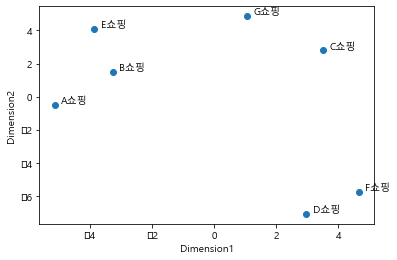

In [4]:
# 2)시각화
#  :Dim1=0, Dim2=0을 기준으로 보면 A,B,E끼리, C와 G, D와 F끼리 상대적으로 강한 경쟁관계에 있고 이외 기업끼린 경쟁관계가 상대적으로 약하다.
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

for name, x, y in zip(mds.shop, X_mds[:,0], X_mds[:,1]):
    plt.annotate(text=name, xy=(x+0.2,y+0.1))
    
plt.scatter(X_mds[:,0],X_mds[:,1])
plt.xlabel("Dimension1")
plt.ylabel("Dimension2")
plt.show()

### $\triangleright$ 속성-경쟁구조
자극점들간의 경쟁구조뿐만 아니라 자극점을 평가하는 주요 속성의 관점도 함께 표현해주는 다차원 척도법이다. 속성 정보는 속성의 선호 벡터를 통해 나타내며 속성의 선호벡터에서 벡터의 방향은 특정 속성에 대한 평가값을 종속변수로 한 회귀분석 결과의 회귀계수 값을, 선호 속성 점은 속성 벡터의 코사인값을 벡터의 길이는 선호 벡터의 신뢰성으로서 회귀분석의 결정계수의 상대적인 크기를 통해 산출하며 일반적으로 0.6이상이면 신뢰할 수 있는 선호벡터라 할 수 있다.
- 자극점과 가까운 속성엔 강하고 반대에 위치한 속성은 취약하다는 뜻이다.
- 속성-경쟁구조 분석에 PROFIT 기법을 많이 사용한다.

In [5]:
# 0)데이터 정규화
# :자극점 좌표와 속성 좌표를 동일한 척도로 계산하기 위해 정규화를 수행했다.
X = mds.loc[:,'이미지':'가격만족도']
X_norm = (X-X.min())/(X.max()-X.min())

In [6]:
# 1)다차원 척도법
# from sklearn.manifold import MDS
X_mds = MDS(n_components=2, random_state=123).fit_transform(X_norm)

C:\Users\ha\Anaconda3\lib\site-packages\sklearn\manifold\_mds.py:517: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


In [9]:
# 2)속성 차원 좌표값 계산
# :각 속성을 종속변수로 하고 차원을 독립변수로 하는 회귀모형을 적합시킨 뒤 회귀계수를 좌표값으로 저장한다.
import statsmodels.formula.api as smf
X_norm[['차원1','차원2']] = X_mds
model = [smf.ols(f'{i} ~ 차원1+차원2', data=X_norm).fit() for i in X_norm.columns[:-2]]
attribute = np.array([[model[i].params[1], model[i].params[2]] for i in range(len(model))])

C:\Users\ha\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


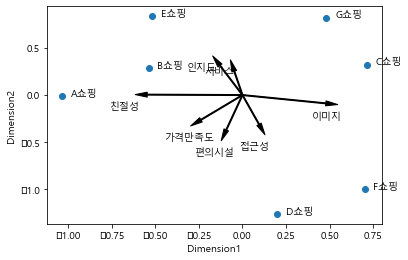

In [10]:
# 3)시각화
# :A쇼핑은 친절성에 강한 경쟁력이 있는 반면 이미지나 접근성에는 취약하다.
#  D쇼핑과 F쇼핑은 이미지와 접근성 관점에서 매우 강력한 경쟁관계임을 알 수 있다.
# import matplotlib.pyplot as plt
# plt.rc('font', family='Malgun Gothic')
# https://frhyme.github.io/python-lib/plt_arrowprops/

for name, x, y in zip(mds.shop, X_mds[:,0], X_mds[:,1]):
    plt.annotate(text=name, xy=(x+0.05, y))
    
for at, x, y in zip(X_norm.columns[:-2], attribute[:,0], attribute[:,1]):
    plt.annotate(text='', xytext=(0,0), xy=(x,y), arrowprops=dict(headwidth=5, width=1, facecolor='black'))
    plt.annotate(text=at, xy=(x-0.15,y-0.15))
    
plt.scatter(X_mds[:,0],X_mds[:,1])
plt.xlabel("Dimension1")
plt.ylabel("Dimension2")
plt.show()

### $\triangleright$ 이상점-경쟁구조
소비자 평가를 바탕으로 다차원 척도법을 수행할 경우 자극점들간 경쟁구조 뿐만 아니라 응답자가 생각하는 이상점을 맵상에 함께 표현해주는 방법이다. 이러한 맵은 조인트 스페이스 맵이라 한다.
- 개별 응답자들의 이상점 뿐 아니라 전체 응답자들의 평균 이상점을 함께 나타낸다.
- PREFMAP 방법을 사용한다.

In [11]:
# 1)고객 응답 데이터, 소비자 평가 데이터 부르기
mds2 = pd.read_csv('data/MDS3.csv', encoding='cp949')

In [12]:
# 2)다차원척도법 
# from sklearn.manifold import MDS
clf = MDS(n_components=2, random_state=123)
X_mds1, X_mds2 = clf.fit_transform(mds.loc[:,'이미지':'가격만족도']), clf.fit_transform(mds2.loc[:,'A쇼핑':'G쇼핑'])

C:\Users\ha\Anaconda3\lib\site-packages\sklearn\manifold\_mds.py:517: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


C:\Users\ha\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


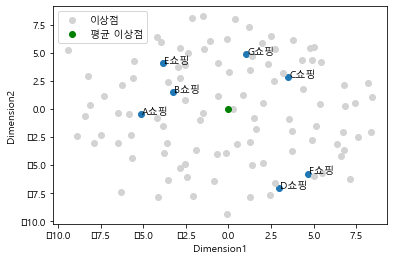

In [13]:
# 3)시각화
# :B쇼핑이 평균 이상점 주변에 가장 가깝다. 
#  D쇼핑과 F쇼핑은 경쟁관계에 있으나 고객들의 이상점이 많지 않고 평균 이상점으로부터 멀어 시장지배력은 약할 것이다.
# import matplotlib.pyplot as plt
# plt.rc('font', family='Malgun Gothic')

for name, x, y in zip(mds.shop, X_mds1[:,0], X_mds1[:,1]):
    plt.annotate(name, xy=(x+0.05, y))
    
plt.scatter(X_mds1[:,0], X_mds1[:,1])
plt.scatter(X_mds2[:,0], X_mds2[:,1], color='lightgray', label='이상점')
plt.plot(X_mds2[:,0].mean(), X_mds2[:,1].mean(), 'o', color='green', label='평균 이상점')
plt.xlabel("Dimension1")
plt.ylabel("Dimension2")
plt.legend()
plt.show()

### $\blacktriangleright$ 상응분석(Correspondence Analysis)
명목척도로 측정된 2개 이상의 범주형 변수들 간 연관성을 분석해 시각적 해석이 용이하도록 기하학적 맵(포지셔닝 맵)으로 제시하는 다변량 통계기법이다.
- 범주형 변수들간 연관성은 빈도교차표의 빈도자료를 사용해 측정한다. 즉 범주형 변수의 범주들의 수에 의해 결정된 행렬이 입력자료가 된다.
- 상응분석을 위해선 등간척도나 서열척도의 변수는 일정한 규칙을 정해 범주형 변수로 전환해야 한다.
- 빈도교차표의 행과 열을 그래프상의 자극점 형태로 표시하는 방법이다.
- 카이제곱 검정과 같이 범주형 변수간 상호연관성을 바탕으로 진행되는 분석 기법으로 빈도교차표에 사용되는 변수가 서로 연관성을 갖고 있다는 전제하에서 진행되어야 한다.

### $\triangleright$ 단순 상응분석
하나의 관측치가 빈도교차표 내 하나의 셀에만 속한 경우의 상응분석이다. 단수, 단일응답으로 이루어진 빈도교차표 자료를 사용하게 된다. 2개의 변수를 활용한 상응분석이다.
- 단순 상응분석이 이루어지는 과정은 아래와 같다.<br>
  1)두 변수의 범주 조합당 빈도를 나타낸 빈도교차표를 작성한다.<br>
  2)카이제곱검정에서 기대빈도를 구한 방법으로 기대 빈도교차표를 작성한다.<br>
  3)카이제곱검정에서 카이제곱통계량을 계산하 듯 카이제곱 행렬표를 작성한다.<br>
  4)카이제곱 행렬표로 각 변수의 범주들에 대한 좌표값을 추정하고 좌표평면에 표현한다.<br>
    이때, 포지셔닝 맵에 나타난 각 축은 특정 속성을 의미하는 것이 아니라 단지 분류 차원을 구분하기 위한 목적으로 특별한 의미를 갖지 않는다.
- 포지셔닝 맵에서 가까이 있는 범주들은 서로 비슷하거나 연관성이 높은 것으로 판단하고 멀리 떨어진 범주들은 서로 다르거나 연관성이 적은 범주들로 해석한다.

In [2]:
# 0)데이터 불러오기
cor = pd.read_csv('data/Correspondence.csv', encoding='cp949')

In [3]:
# 1)빈도교차표 작성
X = pd.crosstab(cor.resort, cor.slope)
display(X)

slope,Slope-H,Slope-L,Slope-M
resort,,,
대명,3,5,2
리솜,3,4,3
무주,2,6,2
용평,4,1,5
한화,5,2,3


In [4]:
# 2)단순 상응분석
# !pip install prince(다른 코드 확인해보기)
import prince
ca = prince.CA(n_components=2).fit(X) # 범주들의 2차원 상 좌표값 변환

<AxesSubplot:title={'center':'Principal coordinates'}, xlabel='Component 0 (90.30% inertia)', ylabel='Component 1 (9.70% inertia)'>

C:\Users\ha\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


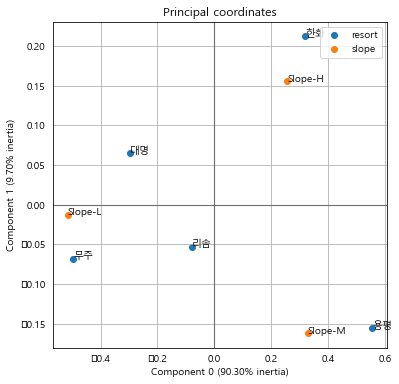

In [6]:
# 3)시각화
# :한화는 상급 슬로프, 용평은 중급 슬로프를 가졌으며 나머지 세 리조트는 하급 슬로프를 가졌고 서로 경쟁한다.
# import matplotlib.pyplot as plt
# plt.rc('font', family='Malgun Gothic')
ca.plot_coordinates(X=X)

In [7]:
# + 리조트 차원좌표, 슬로프 차원좌표는 아래와 같이 출력할 수 있다.
# print('----------리조트 차원좌표----------')
# display(ca.row_coordinates(X))
# print('----------슬로프 차원좌표----------')
# display(ca.column_coordinates(X))

### $\triangleright$ 다중 상응분석
3개 이상의 범주형 변수들의 복합적인 빈도교차표를 이용하는 상응분석기법이다. 복수 혹은 복합 응답으로 이루어진 빈도교차표 자료를 사용한다. 
- 1개의 관측치는 복합적인 빈도교차표 상에서 최소 2개 이상의 셀에 영향을 미친다.
- 다중상응분석의 빈도교차표는 복잡하기에 원자료를 입력자료로 사용하고 통계패키지 내에서 빈도교차표를 작성해 수행한다.
- `동일한 범주값이 2개 이상의 변수에서 중복 사용되지 않도록 해야 한다.`

In [12]:
# 1)다중 상응분석
# import prince
X = cor[['resort','slope','traffic','lodging','etc']]
mca = prince.MCA(n_components=2).fit(X) # 빈도교차표 자동 계산

<AxesSubplot:title={'center':'Row and column principal coordinates'}, xlabel='Component 0 (15.25% inertia)', ylabel='Component 1 (13.16% inertia)'>

C:\Users\ha\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


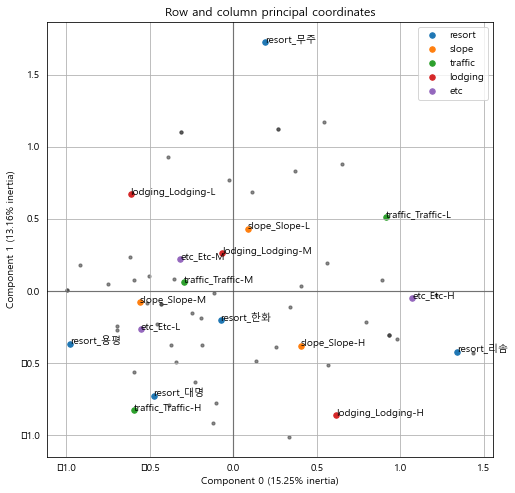

In [13]:
# 2)시각화
# :변수들을 추가하자 용평, 한화, 대명이 경쟁관계에 있다고 결론이 바뀌었고 리솜과 무주는 세 리조트의 경쟁관계와 멀다 밝혀졌다.
#  대명리조트는 용이한 교통편의성 측면에서, 용평리조트는 기타시설 편의성과 평이한 슬로프 측면에서,
#  한화리조트는 수준 높은 슬로프, 기타시설 편의성, 평이한 교통편의성, 평이한 숙박 측면에서 강한 경쟁력을 갖는다.
#  그래프의 축에 나타난 차원별 카이제곱비율(15.25%, 13.16%)의 합이 100이 채 안된다는 것은 분석에서 사용된 변수는 5개지만
#  2차원으로 축소되며 정보 손실이 발생했기 때문이다. 이 비율들은 요인분석의 관점으로 보자면 추출된 요인의 고유값에 대한 비율이다.

# import matplotlib.pyplot as plt
# plt.rc('font', family='Malgun Gothic')
mca.plot_coordinates(X=X, figsize=(8,8), show_column_labels=True)

In [14]:
# + 변수별 차원좌표는 아래와 같이 출력할 수 있다.
# display(mca.column_coordinates(X))

,0,1,2
resort_대명,-0.478198,-0.732122,1.377278
resort_리솜,1.340944,-0.427030,-0.030006
resort_무주,0.192214,1.728775,0.150858
resort_용평,-0.978080,-0.366669,-1.108328
resort_한화,-0.076880,-0.202954,-0.389802
slope_Slope-H,0.404687,-0.382117,-0.392176
slope_Slope-L,0.086027,0.427853,0.872552
slope_Slope-M,-0.561878,-0.080357,-0.602596
traffic_Traffic-H,-0.597015,-0.824843,0.354284
traffic_Traffic-L,0.914458,0.511569,-0.406638
